<a href="https://colab.research.google.com/github/taminemelissa/multi-label-classification/blob/Sirine/Multi_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

Plan :

1. Bibliography : quick summary of the first 
papers, keep the good ideas of modelisation, evaluation, visualisation...
2. Descriptive analysis of the data : genres distribution, genres cardinality, density
3. Definition of the evaluation metrics to keep
4. Definition of the baselines to have a first naive evaluation metric to compare with our future models
5. Split of the dataset (train / validation / test)
6. Some first ML models to predict the genres (binary classification or multi classification)
7. Deepdive into evaluation, results and interpretation
8. Graphic visualisation of the genres distribution
9. More work on the data: NLP on the song titles
10. If time: ensemble techniques

In [ ]:
df= pd.read_parquet("dataset.parquet", engine="pyarrow")

In [ ]:
df.head(10)

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,song_index,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,195,"[0.004609544623288757, -0.0025426075215611364,...","[0.004609544623288757, -0.0025426075215611364,...",Mötley Crüe,Don't Go Away Mad (Just Go Away)
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,417,"[-0.0008367261824495899, 0.0025827261205318714...","[-0.0008367261824495899, 0.0025827261205318714...",No Doubt,Don't Speak
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,530,"[-0.004236157405375977, -0.012008278441109134,...","[-0.004236157405375977, -0.012008278441109134,...",John Williams,The Scroll / To Pankot Palace
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,909,"[0.005594505700256676, -0.0006087187218074026,...","[0.005594505700256676, -0.0006087187218074026,...",Traffic,Dear Mr. Fantasy
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1257,"[-0.013316938885673776, -0.004851930165088419,...","[-0.013316938885673776, -0.004851930165088419,...",Lady Gaga,LoveGame
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1312,"[-0.012693501017843594, -0.005840387725661206,...","[-0.012693501017843594, -0.005840387725661206,...",Lady Gaga,Dance In The Dark
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1538,"[0.00545160954751202, -0.013016183036259246, -...","[0.00545160954751202, -0.013016183036259246, -...",Dean Martin,That's Amore
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1819,"[-0.0009062531385427982, 0.0007978201766033167...","[-0.0009062531385427982, 0.0007978201766033167...",Mary J. Blige,Not Gon' Cry
8,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1878,"[0.008889543533063081, 0.014637242910396697, -...","[0.008889543533063081, 0.014637242910396697, -...",Bob Dylan,My Back Pages
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2090,"[3.513584316030919e-05, -0.0008789451447006535...","[3.513584316030919e-05, -0.0008789451447006535...",My Dying Bride,The Scarlet Garden


In [ ]:
df.describe()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,song_index
count,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000,56763.000000
mean,0.011539,0.040643,0.045575,0.008474,0.132992,0.082342,0.019714,0.053662,0.047196,0.157973,0.028381,0.057256,0.021387,0.022444,0.051319,0.116238,0.095309,0.030830,0.094604,0.027976,0.032662,28198.247943
std,0.106800,0.197463,0.208564,0.091663,0.339569,0.274888,0.139015,0.225351,0.212060,0.364719,0.166061,0.232332,0.144672,0.148124,0.220649,0.320513,0.293643,0.172858,0.292670,0.164905,0.177752,16318.163102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14056.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28186.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42333.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56483.000000


In [ ]:
# 12% metal, 16% rock, 13% pop

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56763 entries, 0 to 56762
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asian           56763 non-null  int32 
 1   rnb             56763 non-null  int32 
 2   reggae          56763 non-null  int32 
 3   blues           56763 non-null  int32 
 4   pop             56763 non-null  int32 
 5   dance           56763 non-null  int32 
 6   folk            56763 non-null  int32 
 7   arabic-music    56763 non-null  int32 
 8   indie           56763 non-null  int32 
 9   rock            56763 non-null  int32 
 10  soulfunk        56763 non-null  int32 
 11  latin           56763 non-null  int32 
 12  classical       56763 non-null  int32 
 13  k-pop           56763 non-null  int32 
 14  brazilian       56763 non-null  int32 
 15  metal           56763 non-null  int32 
 16  rap             56763 non-null  int32 
 17  jazz            56763 non-null  int32 
 18  electr

In [ ]:
# 26 variables: 4 object, 1 index et 21 binaires (genre musical)

In [ ]:
df1= df.drop('song_index', 1)
df1.head()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[0.004609544623288757, -0.0025426075215611364,...","[0.004609544623288757, -0.0025426075215611364,...",Mötley Crüe,Don't Go Away Mad (Just Go Away)
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[-0.0008367261824495899, 0.0025827261205318714...","[-0.0008367261824495899, 0.0025827261205318714...",No Doubt,Don't Speak
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[-0.004236157405375977, -0.012008278441109134,...","[-0.004236157405375977, -0.012008278441109134,...",John Williams,The Scroll / To Pankot Palace
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[0.005594505700256676, -0.0006087187218074026,...","[0.005594505700256676, -0.0006087187218074026,...",Traffic,Dear Mr. Fantasy
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[-0.013316938885673776, -0.004851930165088419,...","[-0.013316938885673776, -0.004851930165088419,...",Lady Gaga,LoveGame


In [ ]:
corr_df=df1.corr()

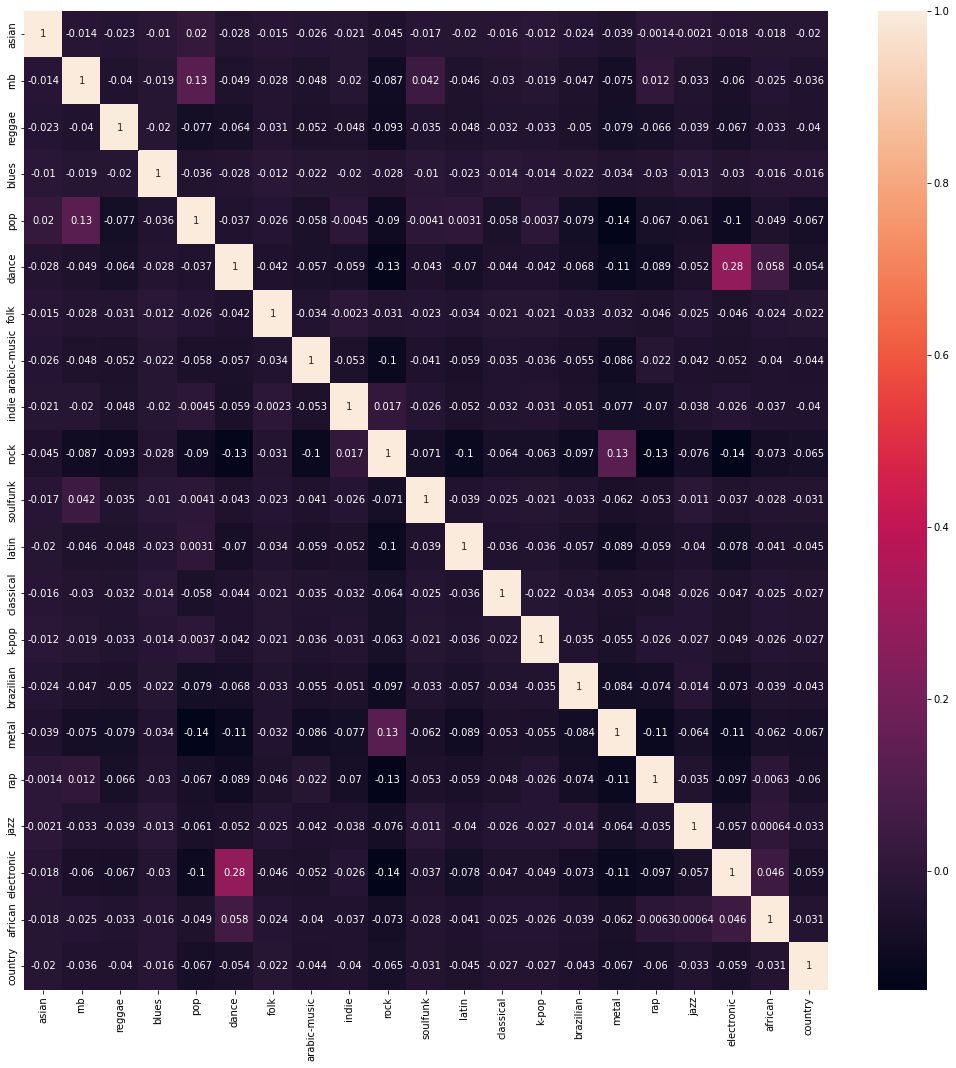

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_df.style.background_gradient(cmap='RdYlGn', axis=1, text_color_threshold= 0.5, low=0.2)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("")\
    .set_precision(2)\
    .set_table_styles(magnify())

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
asian,1.00,-0.01,-0.02,-0.01,0.02,-0.03,-0.02,-0.03,-0.02,-0.04,-0.02,-0.02,-0.02,-0.01,-0.02,-0.04,-0.00,-0.00,-0.02,-0.02,-0.02
rnb,-0.01,1.00,-0.04,-0.02,0.13,-0.05,-0.03,-0.05,-0.02,-0.09,0.04,-0.05,-0.03,-0.02,-0.05,-0.07,0.01,-0.03,-0.06,-0.02,-0.04
reggae,-0.02,-0.04,1.00,-0.02,-0.08,-0.06,-0.03,-0.05,-0.05,-0.09,-0.04,-0.05,-0.03,-0.03,-0.05,-0.08,-0.07,-0.04,-0.07,-0.03,-0.04
blues,-0.01,-0.02,-0.02,1.00,-0.04,-0.03,-0.01,-0.02,-0.02,-0.03,-0.01,-0.02,-0.01,-0.01,-0.02,-0.03,-0.03,-0.01,-0.03,-0.02,-0.02
pop,0.02,0.13,-0.08,-0.04,1.00,-0.04,-0.03,-0.06,-0.00,-0.09,-0.00,0.00,-0.06,-0.00,-0.08,-0.14,-0.07,-0.06,-0.10,-0.05,-0.07
dance,-0.03,-0.05,-0.06,-0.03,-0.04,1.00,-0.04,-0.06,-0.06,-0.13,-0.04,-0.07,-0.04,-0.04,-0.07,-0.11,-0.09,-0.05,0.28,0.06,-0.05
folk,-0.02,-0.03,-0.03,-0.01,-0.03,-0.04,1.00,-0.03,-0.00,-0.03,-0.02,-0.03,-0.02,-0.02,-0.03,-0.03,-0.05,-0.03,-0.05,-0.02,-0.02
arabic-music,-0.03,-0.05,-0.05,-0.02,-0.06,-0.06,-0.03,1.00,-0.05,-0.10,-0.04,-0.06,-0.04,-0.04,-0.06,-0.09,-0.02,-0.04,-0.05,-0.04,-0.04
indie,-0.02,-0.02,-0.05,-0.02,-0.00,-0.06,-0.00,-0.05,1.00,0.02,-0.03,-0.05,-0.03,-0.03,-0.05,-0.08,-0.07,-0.04,-0.03,-0.04,-0.04
rock,-0.04,-0.09,-0.09,-0.03,-0.09,-0.13,-0.03,-0.10,0.02,1.00,-0.07,-0.10,-0.06,-0.06,-0.10,0.13,-0.13,-0.08,-0.14,-0.07,-0.06


In [ ]:
import pandas as pd
import numpy as np


corr_df.style.background_gradient(cmap='RdYlGn')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
asian,1.000000,-0.013885,-0.022819,-0.009988,0.019864,-0.028165,-0.015322,-0.025729,-0.020935,-0.044538,-0.017473,-0.019527,-0.015973,-0.011917,-0.024382,-0.038670,-0.001363,-0.002093,-0.018017,-0.018330,-0.019854
rnb,-0.013885,1.000000,-0.039844,-0.019028,0.126428,-0.048673,-0.027905,-0.048221,-0.020145,-0.086705,0.041651,-0.045732,-0.030428,-0.019141,-0.047467,-0.074646,0.011887,-0.032581,-0.060436,-0.024639,-0.036315
reggae,-0.022819,-0.039844,1.000000,-0.020201,-0.076878,-0.063615,-0.030989,-0.051661,-0.047838,-0.092798,-0.035313,-0.048035,-0.032305,-0.033111,-0.050059,-0.078723,-0.065749,-0.038975,-0.066885,-0.032974,-0.039679
blues,-0.009988,-0.019028,-0.020201,1.000000,-0.035641,-0.027692,-0.011727,-0.022014,-0.019669,-0.028449,-0.010013,-0.022782,-0.013667,-0.014008,-0.021501,-0.033527,-0.030006,-0.013153,-0.029883,-0.015683,-0.015906
pop,0.019864,0.126428,-0.076878,-0.035641,1.000000,-0.036918,-0.026430,-0.058038,-0.004473,-0.090264,-0.004139,0.003077,-0.057540,-0.003654,-0.078865,-0.136697,-0.066872,-0.060849,-0.100542,-0.048511,-0.067297
dance,-0.028165,-0.048673,-0.063615,-0.027692,-0.036918,1.000000,-0.042479,-0.056827,-0.059416,-0.127112,-0.043477,-0.069684,-0.044284,-0.041928,-0.067637,-0.108037,-0.088933,-0.052314,0.276754,0.057613,-0.054322
folk,-0.015322,-0.027905,-0.030989,-0.011727,-0.026430,-0.042479,1.000000,-0.033769,-0.002278,-0.030846,-0.022710,-0.034402,-0.020964,-0.021488,-0.032982,-0.031660,-0.046028,-0.025293,-0.045840,-0.024058,-0.021780
arabic-music,-0.025729,-0.048221,-0.051661,-0.022014,-0.058038,-0.056827,-0.033769,1.000000,-0.052998,-0.103142,-0.040698,-0.058684,-0.035203,-0.036082,-0.055384,-0.086360,-0.021647,-0.042471,-0.051598,-0.039924,-0.043756
indie,-0.020935,-0.020145,-0.047838,-0.019669,-0.004473,-0.059416,-0.002278,-0.052998,1.000000,0.017264,-0.025531,-0.052345,-0.032328,-0.030919,-0.051388,-0.077346,-0.070258,-0.037773,-0.026241,-0.036750,-0.039962
rock,-0.044538,-0.086705,-0.092798,-0.028449,-0.090264,-0.127112,-0.030846,-0.103142,0.017264,1.000000,-0.071119,-0.103417,-0.064032,-0.063348,-0.097238,0.128057,-0.131210,-0.075856,-0.138196,-0.073482,-0.064916


Text(0.5, -0.15, 'Matrice de corrélation')

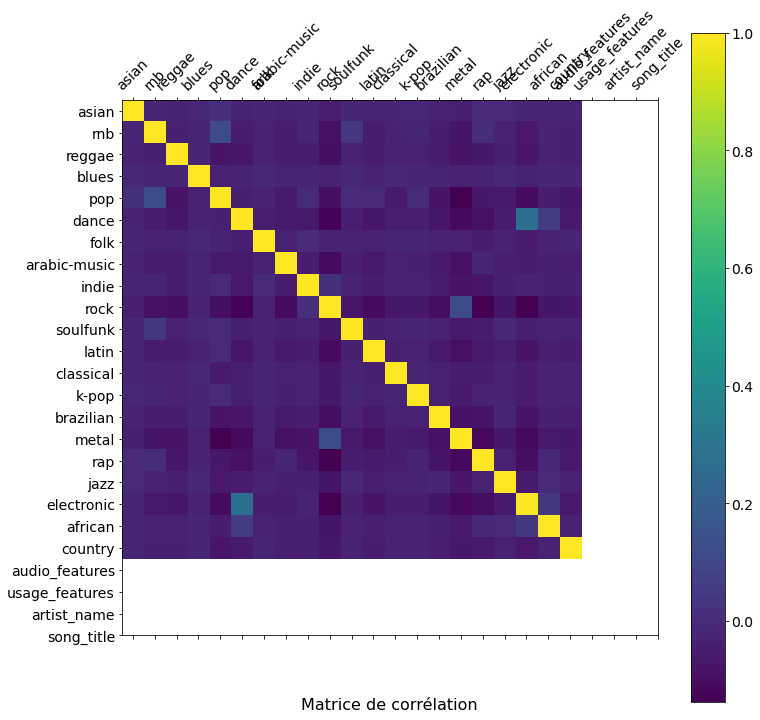

In [ ]:
f = plt.figure(figsize=(12, 12))

plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [ ]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].sum().sort_values(ascending=False)

In [ ]:
y

rock            8967
pop             7549
metal           6598
rap             5410
electronic      5370
dance           4674
latin           3250
arabic-music    3046
brazilian       2913
indie           2679
reggae          2587
rnb             2307
country         1854
jazz            1750
soulfunk        1611
african         1588
k-pop           1274
classical       1214
folk            1119
asian            655
blues            481
dtype: int64

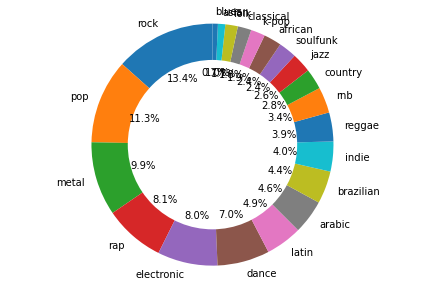

In [ ]:

labels = 'rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues',
sizes = [8967,7549,6598,5410,5370,4674,3250,3046,2913,2679,2587,2307,1854,1750,1611,1588,1274,1214,1119,655,481]


 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

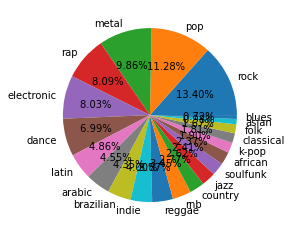

In [ ]:
import matplotlib.pyplot as plt

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = [8967,7549,6598,5410,5370,4674,3250,3046,2913,2679,2587,2307,1854,1750,1611,1588,1274,1214,1119,655,481]

labels = ['rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  '.format(p=pct)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [ ]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].mean().sort_values(ascending=False)
y=y*100
y

rock            15.797262
pop             13.299156
metal           11.623769
rap              9.530856
electronic       9.460388
dance            8.234237
latin            5.725561
arabic-music     5.366172
brazilian        5.131864
indie            4.719624
reggae           4.557546
rnb              4.064267
country          3.266212
jazz             3.082994
soulfunk         2.838116
african          2.797597
k-pop            2.244420
classical        2.138717
folk             1.971355
asian            1.153921
blues            0.847383
dtype: float64

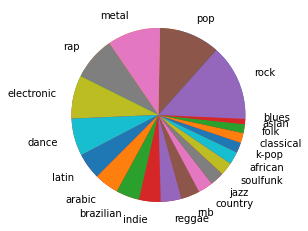

In [ ]:
import matplotlib.pyplot as plt
 
# create random data
names='rock','pop','metal','rap','electronic','dance','latin','arabic','brazilian','indie','reggae','rnb','country','jazz','soulfunk','african','k-pop','classical','folk','asian','blues',
values=[15.8,13.3,11.62,9.53,9.46,8.23,5.73,5.37,5.13,4.72,4.56,4.06,3.26,3.08,2.84,2.8,2.24,2.14,1.97,1.15,0.85]
 
# Create a pieplot
plt.pie(size_of_groups)

# Label distance: gives the space between labels and the center of the pie

plt.pie(values, labels=names, labeldistance=1.2);
plt.show();

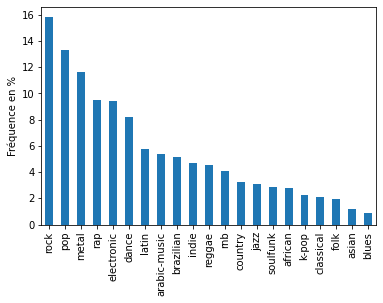

In [ ]:
labels=list(df.columns)

labels.remove('song_index')
labels.remove('audio_features')
labels.remove('usage_features')
labels.remove('artist_name')
labels.remove('song_title')
n=len(labels)
y=df[labels].mean().sort_values(ascending=False)
y=y*100
ax = y.plot(kind='bar')
ax.set_ylabel('Fréquence en %')
plt.show()

In [ ]:
D = len(df) #nombre de chansons de la base
L = 21 #nombre de genres
df["nbr labels"] = df.iloc[:,0:21].sum(axis=1) #nombre de labels par chanson

In [ ]:
#label cardinality
label_cardinality = df["nbr labels"].sum()/D
print(label_cardinality)

#label density
label_density = label_cardinality/L
print(label_density)

1.1785141729647834
0.05611972252213254


Text(0.5, 1.0, 'Le nombre de labels par chanson')

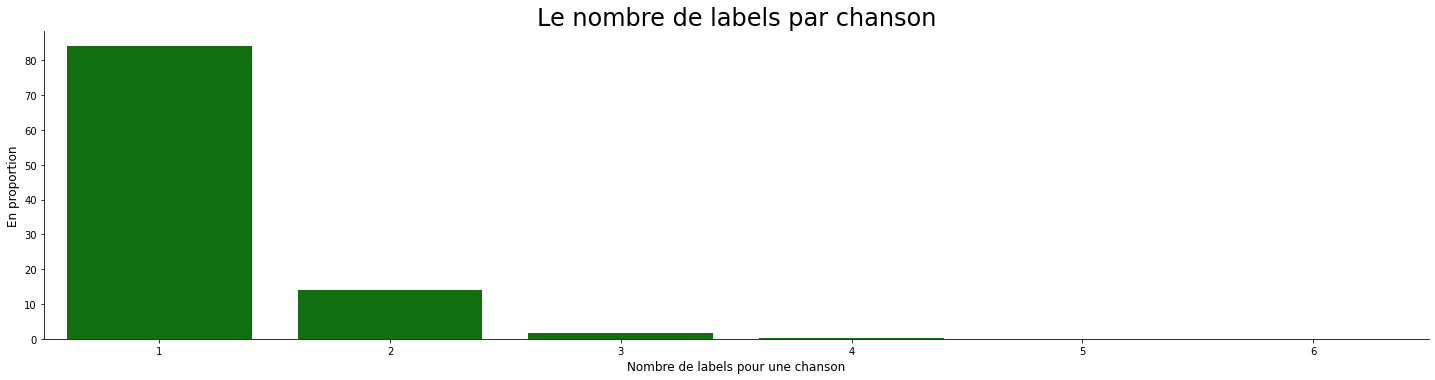

In [ ]:
# Les chansons en fonction du nombre de labels
df2=df.groupby("nbr labels").agg({'asian':'count'})
df2.rename({'asian':'Nbre de chansons'},axis=1,inplace=True)
df2["Nbre labels"]=df2.index
df2["Pourcentage"]=df2['Nbre de chansons']*100/D
g = sns.catplot(x='Nbre labels', y='Pourcentage', data=df2, kind = "bar", height = 5, aspect = 4, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Nombre de labels pour une chanson', size = 12)
plt.ylabel('En proportion', size = 12)
plt.title('Le nombre de labels par chanson', size=24)